In [1]:
import matplotlib.pyplot as plt
import numpy as np
from typing import Final


In [2]:
num_experiments: Final[int] = 100
bins: Final[int] = 5

Модель Рикера


In [3]:
a: Final[int] = 300
b: Final[int] = 1
n: Final[int] = 1000
c: Final[float] = 1 / 48
x_0: Final[float] = 1.01

In [4]:
x = np.zeros(n)
x[0] = x_0
for i in range(1, n):
    x[i] = a * x[i - 1] * np.exp(-b * x[i - 1])

assert np.all(x <= a / (b * np.e))


In [5]:
x_ln = np.zeros(n)
x_ln[0] = np.log(x[0])
for i in range(1, n):
    x_ln[i] = x_ln[i - 1] + np.log(a) - b * x[i - 1]

In [6]:
b_list = np.zeros(num_experiments)
a_list = np.zeros(num_experiments)


for i in range(num_experiments):
    epsilon = np.random.normal(loc=0, scale=np.sqrt(c), size=n)
    # epsilon.sort()

    y = x * np.exp(epsilon)

    b_line = (
        2
        * np.exp(c / 2)
        * ((y * np.log(y)).mean() - c * y.mean() - y.mean() * np.log(y).mean())
        / ((y**2).mean() * np.exp(-c) - y.mean() ** 2)
    )
    b_list[i] = b_line

    a_line = np.exp(b_line * y.mean() * np.exp(-c / 2))

    a_list[i] = a_line


In [7]:
def show_graf_table(lst, bins: int, color: str = "lime") -> None:
    plt.hist(lst, bins=bins, edgecolor="black", color=color)
    # plt.title("Гистограмма частот для оценки параметра delta_h")
    # plt.xlabel("Оценка параметра delta_h")
    # plt.ylabel("Частота")
    plt.grid(True)
    plt.show()

    hist, bin_edges = np.histogram(lst, bins=bins)

    print("Интервал\t\tЧастота")
    for i in range(bins):
        print(f"[{bin_edges[i]:.4f}, {bin_edges[i + 1]:.4f})\t{hist[i]}")

a


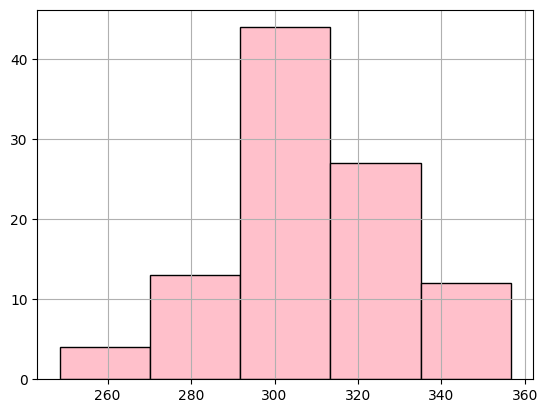

Интервал		Частота
[248.5583, 270.1743)	4
[270.1743, 291.7904)	13
[291.7904, 313.4064)	44
[313.4064, 335.0224)	27
[335.0224, 356.6384)	12


b


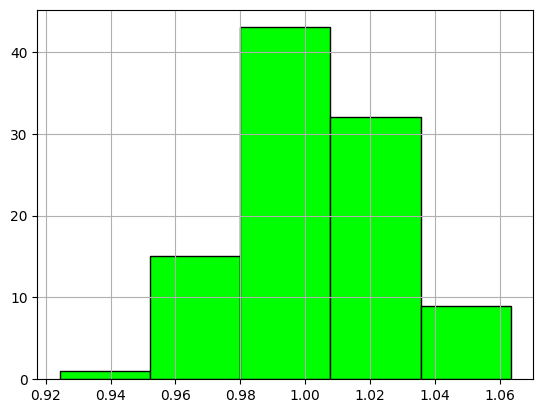

Интервал		Частота
[0.9244, 0.9522)	1
[0.9522, 0.9800)	15
[0.9800, 1.0078)	43
[1.0078, 1.0356)	32
[1.0356, 1.0634)	9


In [8]:
print("a")
show_graf_table(a_list, bins, "pink")

print("\n\nb")
show_graf_table(b_list, bins, "lime")
